In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense, Flatten


In [2]:
((train_data, train_labels),(test_data, test_labels)) = tf.keras.datasets.mnist.load_data()

In [3]:
train_data = train_data/np.float32(255)
train_labels = train_labels.astype(np.int32)  
test_data = test_data/np.float32(255)
test_labels = test_labels.astype(np.int32)


In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=int32)

In [5]:
model = K.Sequential([
                      # Dense(64,  activation='relu'),
                      # Dense(32,  activation='relu'),
                      Flatten(input_shape=(28, 28)),
                      Dense(10, activation='sigmoid')
])
model.summary()

2022-09-17 11:59:13.401202: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-17 11:59:13.401383: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [7]:
history = model.fit(x=train_data,y=train_labels, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50


2022-09-17 11:59:22.259446: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
/Users/sjkang/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-09-17 11:59:22.381288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1490/1500 [============================>.] - ETA: 0s - loss: 0.5120 - accuracy: 0.8681

2022-09-17 11:59:28.696325: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 7s 4ms/step - loss: 0.5111 - accuracy: 0.8684 - val_loss: 0.3155 - val_accuracy: 0.9134
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3178 - accuracy: 0.9109 - val_loss: 0.2859 - val_accuracy: 0.9194
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2936 - accuracy: 0.9174 - val_loss: 0.2799 - val_accuracy: 0.9218
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2816 - accuracy: 0.9204 - val_loss: 0.2692 - val_accuracy: 0.9257
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2740 - accuracy: 0.9231 - val_loss: 0.2651 - val_accuracy: 0.9279
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2682 - accuracy: 0.9245 - val_loss: 0.2634 - val_accuracy: 0.9286
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2638 - accuracy: 0.9255 - val_loss: 0.2626 - val_accuracy: 0.9286
Epo

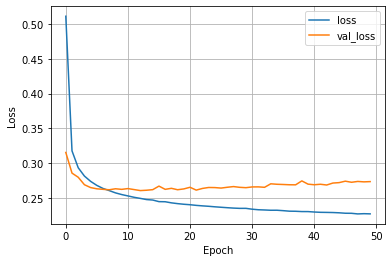

In [8]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [9]:
predictions = model.predict(test_data)

2022-09-17 12:06:02.320878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [10]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Pred {} Conf: {:2.0f}% True ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

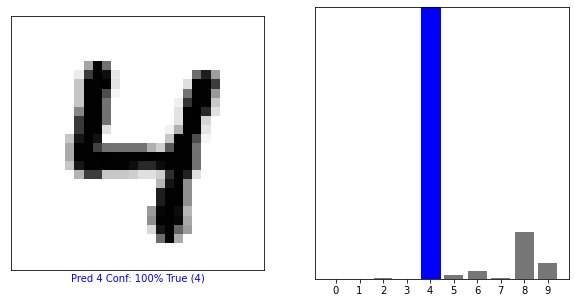

In [11]:
i = 56
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [12]:
better_model = K.Sequential([
                      Flatten(input_shape=(28, 28)),
                      Dense(128,  activation='relu'),
                      #Dense(64,  activation='relu'),
                      Dense(10, activation='softmax')
])
better_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
better_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
history = better_model.fit(x=train_data,y=train_labels, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10


2022-09-17 12:07:24.706333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - ETA: 0s - loss: 0.2830 - accuracy: 0.9193

2022-09-17 12:07:30.907314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 7s 5ms/step - loss: 0.2830 - accuracy: 0.9193 - val_loss: 0.1574 - val_accuracy: 0.9566
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1271 - accuracy: 0.9626 - val_loss: 0.1135 - val_accuracy: 0.9671
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0877 - accuracy: 0.9744 - val_loss: 0.0993 - val_accuracy: 0.9717
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0647 - accuracy: 0.9807 - val_loss: 0.0933 - val_accuracy: 0.9721
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0487 - accuracy: 0.9853 - val_loss: 0.0946 - val_accuracy: 0.9731
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0390 - accuracy: 0.9885 - val_loss: 0.0884 - val_accuracy: 0.9760
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0311 - accuracy: 0.9907 - val_loss: 0.0866 - val_accuracy: 0.9752
Epo

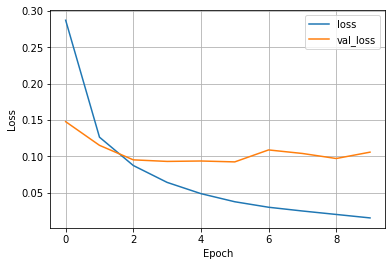

In [19]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

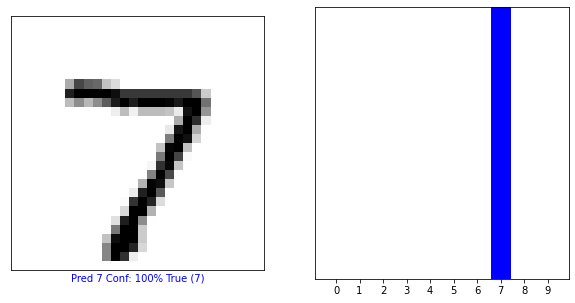

In [20]:
predictions = better_model.predict(test_data)
i = 0
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()